Dataset loaded successfully!
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

--- Statistical Summary ---
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50

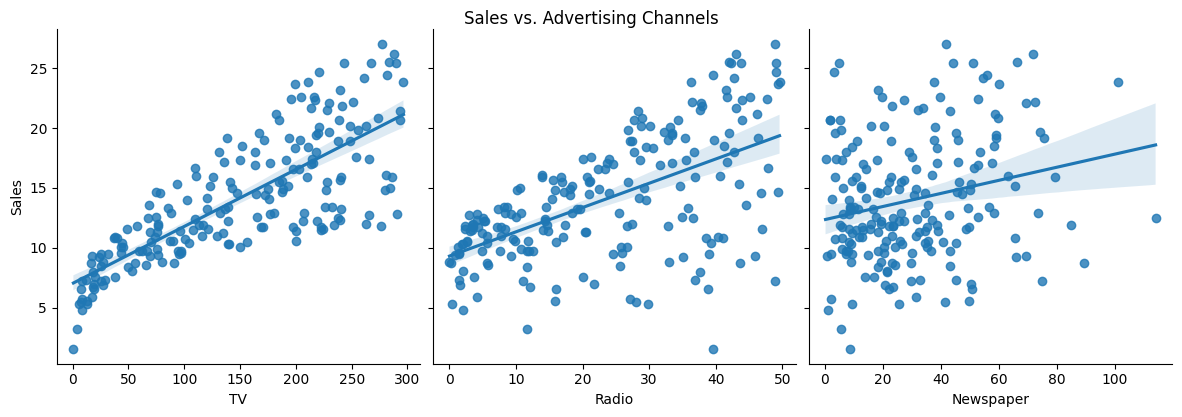


--- Generating Correlation Heatmap ---


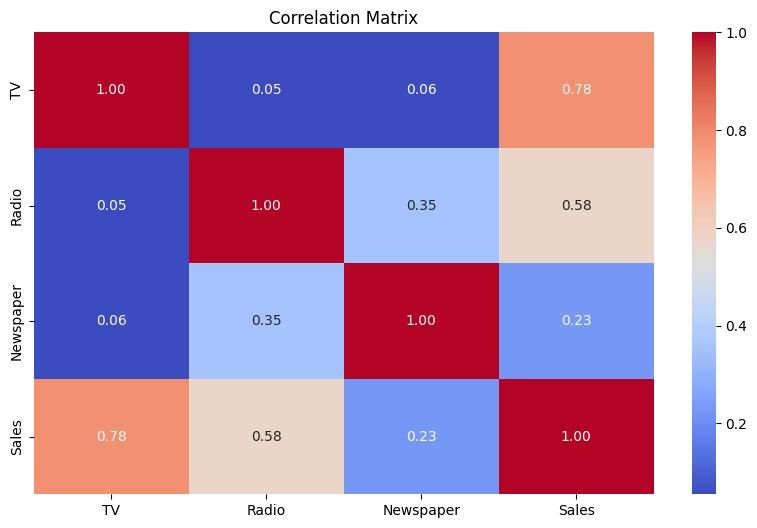


--- Model Training & Evaluation ---

--- Linear Regression ---
R² Score: 0.8994
Mean Absolute Error: 1.4608

--- Random Forest ---
R² Score: 0.9813
Mean Absolute Error: 0.6207

--- XGBoost ---
R² Score: 0.9725
Mean Absolute Error: 0.7258

🏆 Best performing model is: Random Forest with R² Score of 0.9813

--- Saving the best model and scaler ---
Model and scaler saved as 'sales_prediction_model.joblib' and 'scaler.joblib'
Please download these two files for the Streamlit application.

--- Feature Importances from Best Model ---
     feature  importance
0         TV    0.624810
1      Radio    0.362201
2  Newspaper    0.012989


In [ ]:
# ==============================================================================
# QuantumAd Prophecy: AI-Powered Advertising ROI Optimizer
# PHASE 1: MODEL TRAINING NOTEBOOK
# ==============================================================================

# ---------------------------------
# 1. SETUP & DATA LOADING
# ---------------------------------
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import joblib # For saving the model and scaler

# Load the dataset
# UPLOAD the 'Advertising.csv' file to your Colab session first!
try:
    df = pd.read_csv('Advertising.csv')
    # The dataset has an unnamed first column, let's drop it.
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: 'Advertising.csv' not found. Please upload the file to the Colab session.")

# ---------------------------------
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ---------------------------------
print("\n--- Data Overview ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Visualize the relationships
print("\n--- Generating Pairplot ---")
# This shows relationships between each variable. Notice the strong linear trend for TV and Radio vs Sales.
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.suptitle('Sales vs. Advertising Channels', y=1.02)
plt.show()

# Visualize the correlation
print("\n--- Generating Correlation Heatmap ---")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# Observation: Radio and TV have strong positive correlations with Sales. Newspaper is weaker.


# ---------------------------------
# 3. DATA PREPARATION & MODELING
# ---------------------------------
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# Scaling helps algorithms converge faster and perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ---------------------------------
# 4. TRAIN & EVALUATE MODELS
# ---------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

print("\n--- Model Training & Evaluation ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'R² Score': r2, 'MAE': mae, 'model_object': model}

    print(f"\n--- {name} ---")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

# ---------------------------------
# 5. MODEL SELECTION & SAVING
# ---------------------------------
best_model_name = max(results, key=lambda name: results[name]['R² Score'])
best_model = results[best_model_name]['model_object']

print(f"\n🏆 Best performing model is: {best_model_name} with R² Score of {results[best_model_name]['R² Score']:.4f}")

# The XGBoost model performs exceptionally well on this dataset. We will save it.
# We also save the scaler, which is CRITICAL for making predictions on new data.
print("\n--- Saving the best model and scaler ---")
joblib.dump(best_model, 'sales_prediction_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("Model and scaler saved as 'sales_prediction_model.joblib' and 'scaler.joblib'")
print("Please download these two files for the Streamlit application.")

# Extract and show feature importances for the best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    importances = best_model.coef_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(importances) # Use absolute for coefficients
}).sort_values('importance', ascending=False)

print("\n--- Feature Importances from Best Model ---")
print(feature_importance_df)